In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection  import cross_val_score as CVS

In [121]:
df = pd.read_csv('mushrooms.csv')

In [122]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [123]:
df.shape

(8124, 23)

In [124]:
df.describe(include='all').T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [126]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [127]:
print("Value distribution:")
col = np.array(df.columns)
for i in range(len(col)):
  data = pd.DataFrame(df[col[i]].value_counts())
  print(data)
  print('\n')

Value distribution:
   class
e   4208
p   3916


   cap-shape
x       3656
f       3152
k        828
b        452
s         32
c          4


   cap-surface
y         3244
s         2556
f         2320
g            4


   cap-color
n       2284
g       1840
e       1500
y       1072
w       1040
b        168
p        144
c         44
u         16
r         16


   bruises
f     4748
t     3376


   odor
n  3528
f  2160
y   576
s   576
a   400
l   400
p   256
c   192
m    36


   gill-attachment
f             7914
a              210


   gill-spacing
c          6812
w          1312


   gill-size
b       5612
n       2512


   gill-color
b        1728
p        1492
w        1202
n        1048
g         752
h         732
u         492
k         408
e          96
y          86
o          64
r          24


   stalk-shape
t         4608
e         3516


   stalk-root
b        3776
?        2480
e        1120
c         556
r         192


   stalk-surface-above-ring
s                      5

In [128]:
df[col[0]].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [129]:
count = np.array(df[col[0]].value_counts())

In [130]:
count

array([4208, 3916])

In [131]:
class_label = []
for i in range(len(df[col[0]])):
  if(df[col[0]][i] == 'e'):
    class_label.append(0)
  else:
    class_label.append(1)

In [132]:
class_label

[1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [133]:
class_label = pd.Series(class_label)

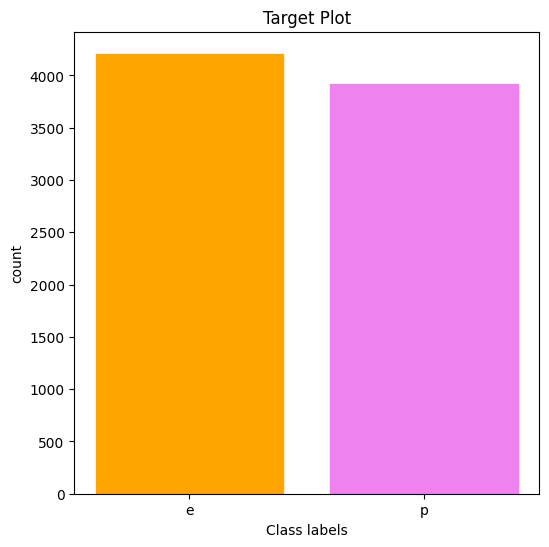

In [134]:
fig = plt.figure(figsize = (6,6))
label = ['e','p']
bars = plt.bar(label,count)
bars[0].set_color('orange')
bars[1].set_color('violet')
plt.title('Target Plot')
plt.xlabel('Class labels')
plt.ylabel('count')
plt.show()

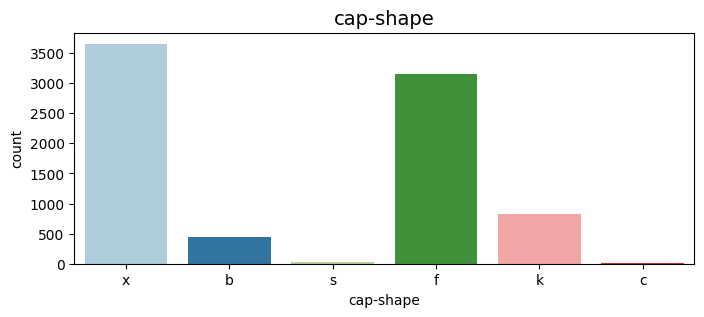

% of total:
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


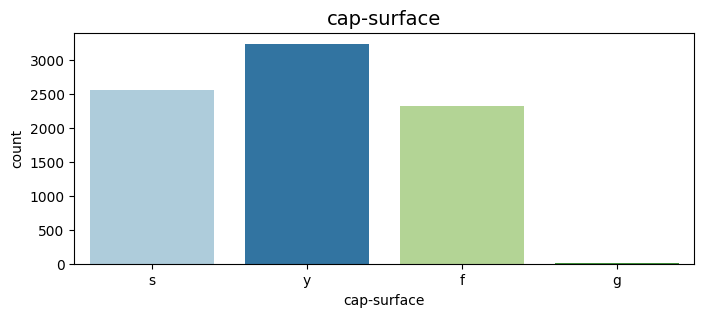

% of total:
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


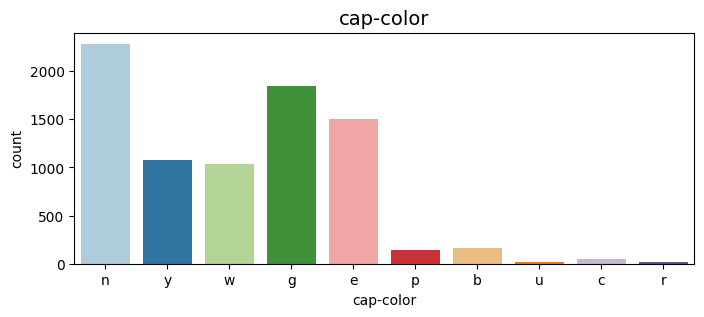

% of total:
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
u     0.20
r     0.20
Name: cap-color, dtype: float64


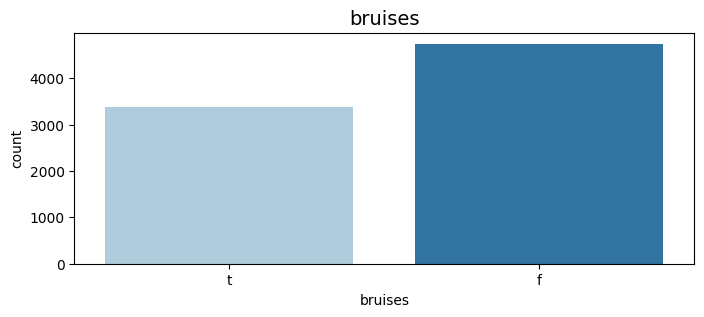

% of total:
f    58.44
t    41.56
Name: bruises, dtype: float64


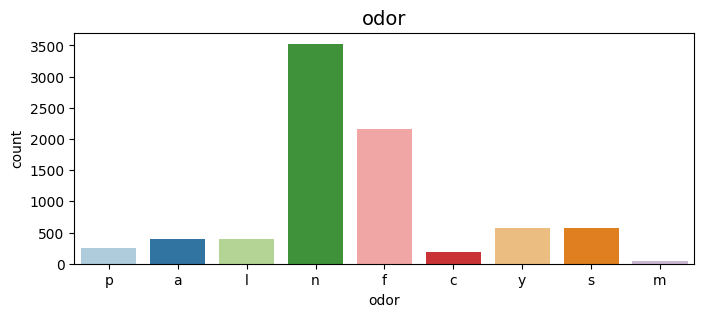

% of total:
n    43.43
f    26.59
y     7.09
s     7.09
a     4.92
l     4.92
p     3.15
c     2.36
m     0.44
Name: odor, dtype: float64


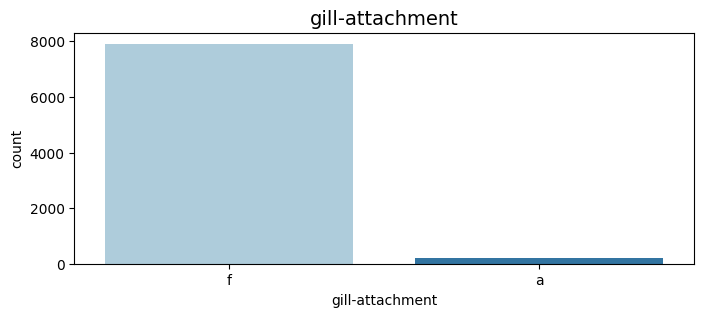

% of total:
f    97.42
a     2.58
Name: gill-attachment, dtype: float64


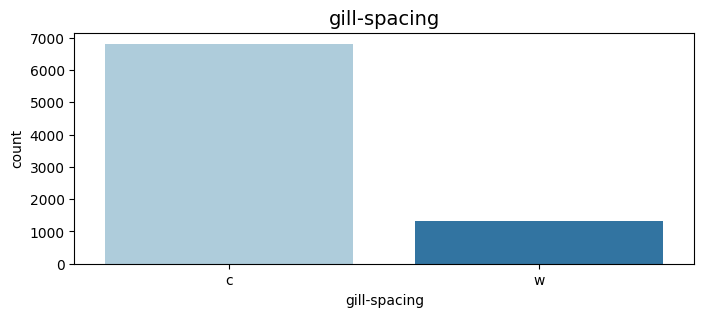

% of total:
c    83.85
w    16.15
Name: gill-spacing, dtype: float64


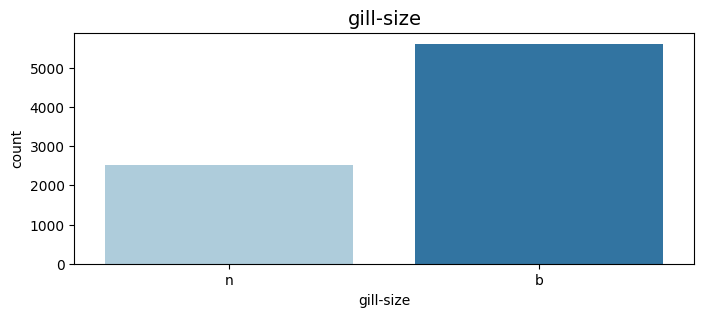

% of total:
b    69.08
n    30.92
Name: gill-size, dtype: float64


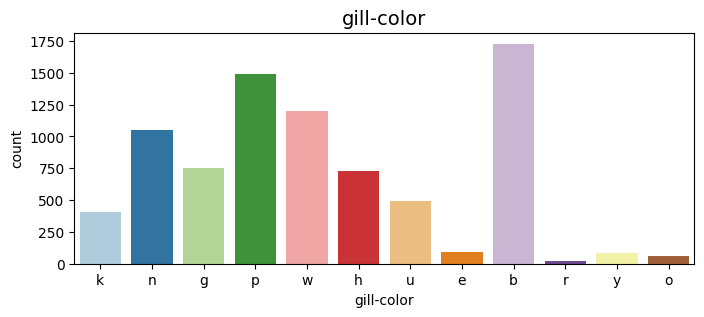

% of total:
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: gill-color, dtype: float64


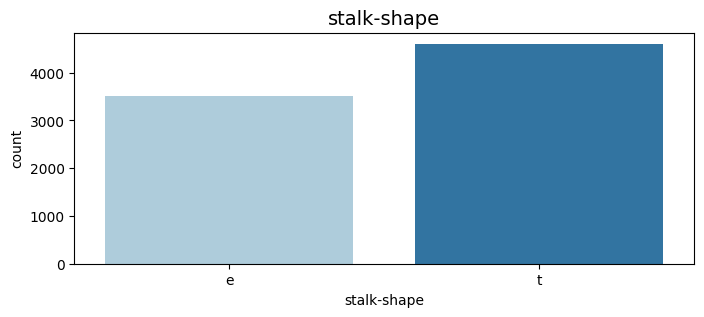

% of total:
t    56.72
e    43.28
Name: stalk-shape, dtype: float64


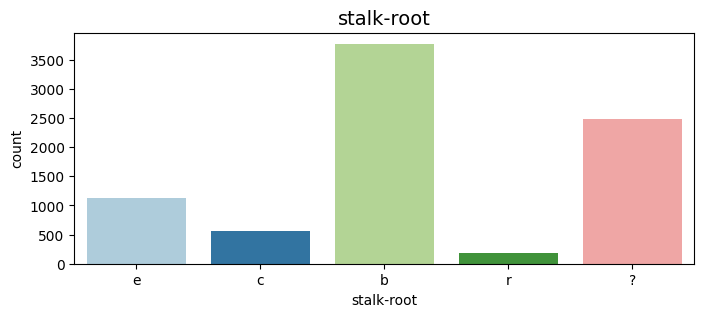

% of total:
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: stalk-root, dtype: float64


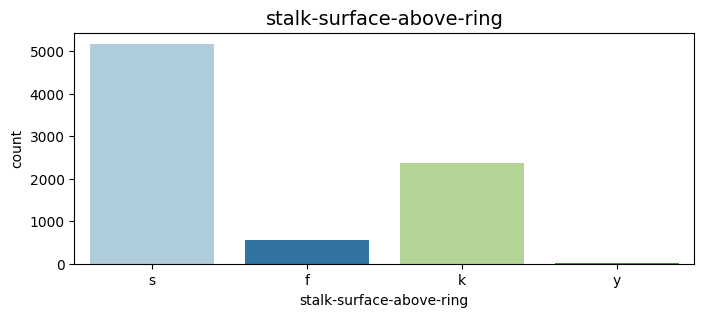

% of total:
s    63.71
k    29.20
f     6.79
y     0.30
Name: stalk-surface-above-ring, dtype: float64


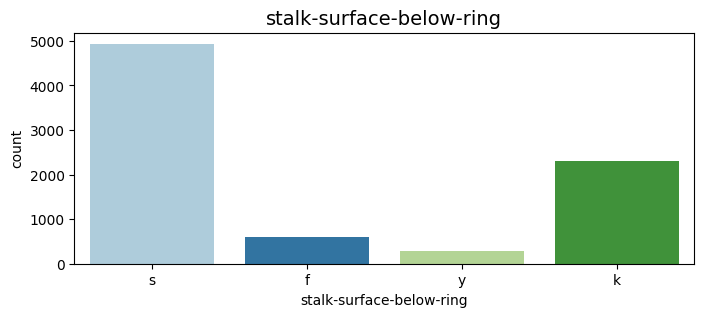

% of total:
s    60.76
k    28.36
f     7.39
y     3.50
Name: stalk-surface-below-ring, dtype: float64


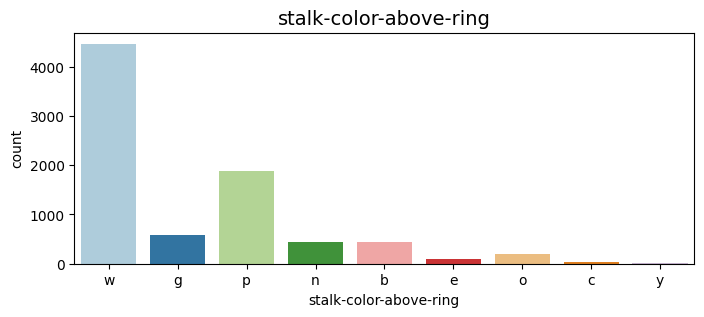

% of total:
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: stalk-color-above-ring, dtype: float64


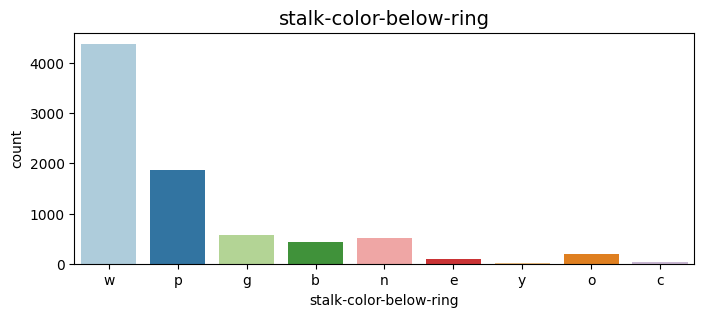

% of total:
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: stalk-color-below-ring, dtype: float64


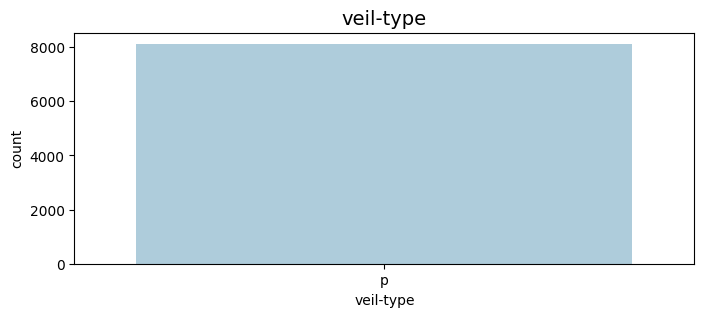

% of total:
p    100.0
Name: veil-type, dtype: float64


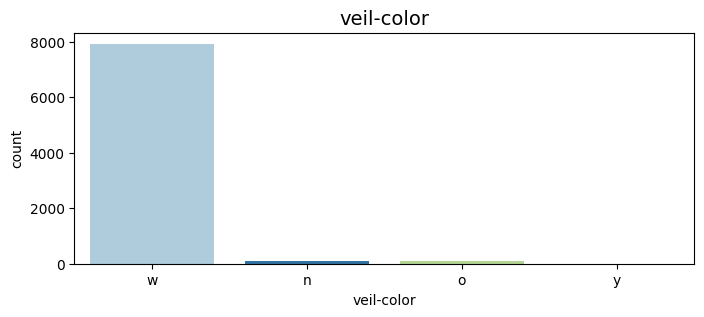

% of total:
w    97.54
n     1.18
o     1.18
y     0.10
Name: veil-color, dtype: float64


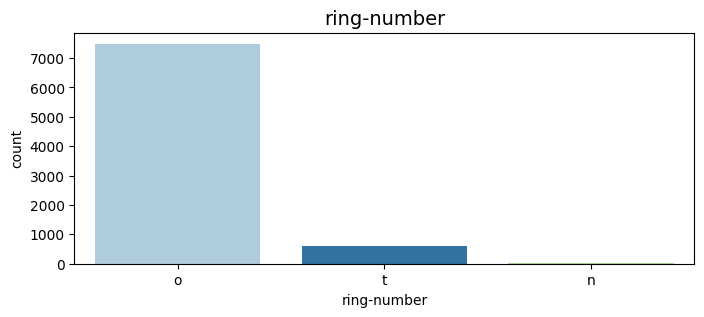

% of total:
o    92.17
t     7.39
n     0.44
Name: ring-number, dtype: float64


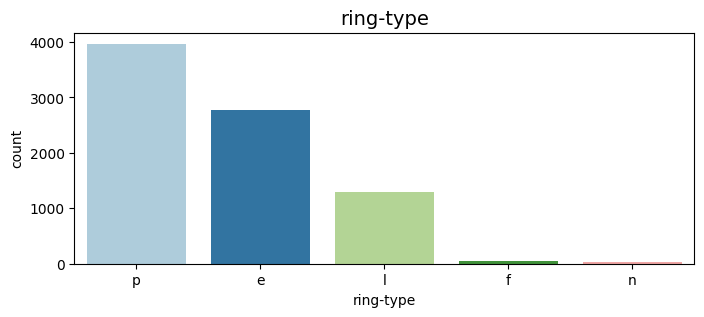

% of total:
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: ring-type, dtype: float64


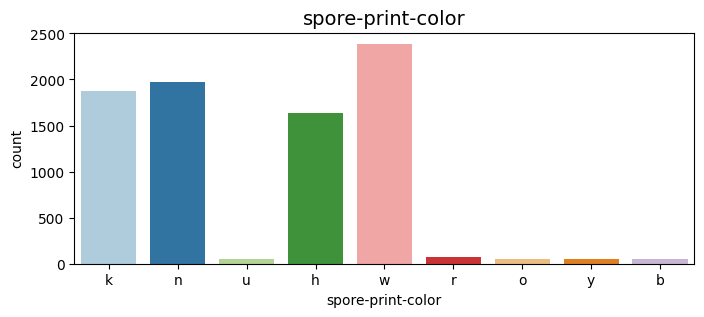

% of total:
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
u     0.59
o     0.59
y     0.59
b     0.59
Name: spore-print-color, dtype: float64


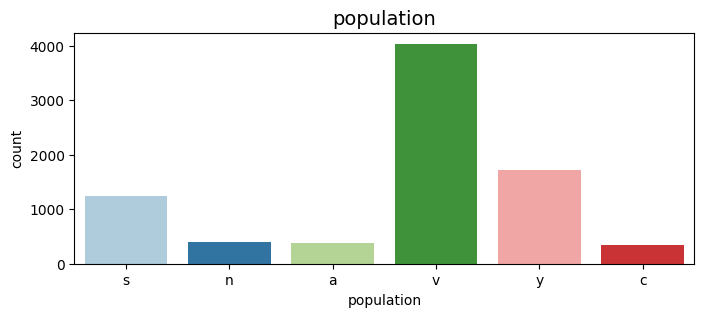

% of total:
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64


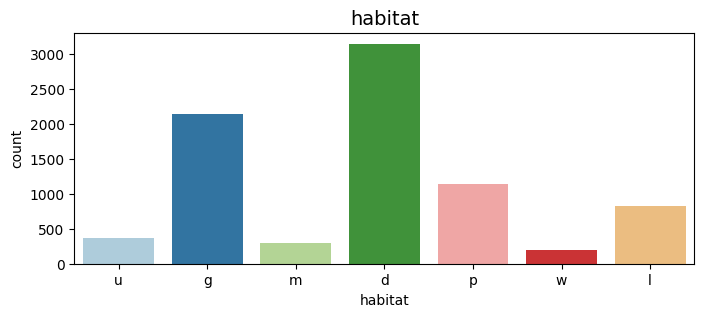

% of total:
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64


In [135]:
for column in col[1:]:
    plt.figure(figsize=(8,3))
    sns.countplot(x=column , data=df ,palette='Paired')
    plt.title(column, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((df[column].value_counts()/df.shape[0]),4)*100)

In [136]:
cap_color = df['cap-color'].value_counts()

In [137]:
cap_ind = np.array(cap_color.index)
cap_ind

array(['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r'], dtype=object)

In [138]:
cap_color

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

In [139]:
cap_color = np.array(cap_color)
cap_color

array([2284, 1840, 1500, 1072, 1040,  168,  144,   44,   16,   16])

Text(0.5, 1.0, 'Bar plot between Mushroom cap-color and quantity')

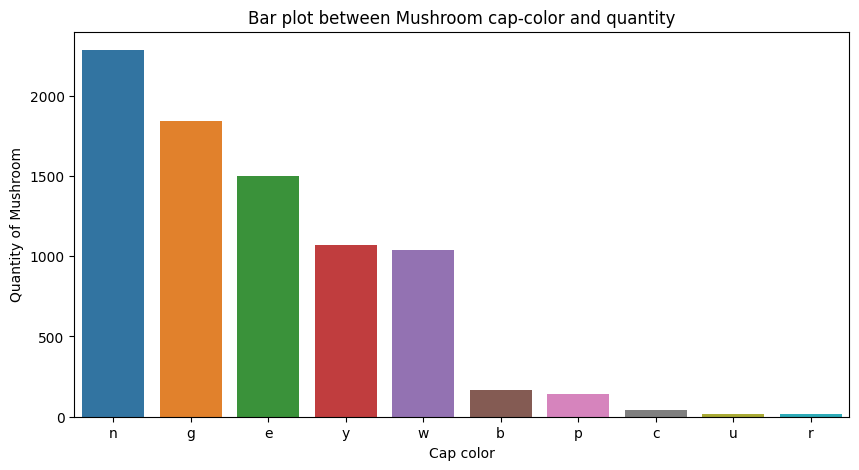

In [140]:
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x=cap_ind, y=cap_color)
# plt.xticks(cap_ind,['Brown','Gray','Red','Yellow','White','Buff','Pink','Cinnamon','Purple','Green'])
plt.xlabel('Cap color')
plt.ylabel('Quantity of Mushroom')
plt.title('Bar plot between Mushroom cap-color and quantity')

In [141]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [142]:
poisonous = []
edible = []
for ind in cap_ind:
  p = 0
  for color in range(len(df['cap-color'])):
    # print(color, ind)
    if(df['cap-color'][color] == ind and df['class'][color] == 'p'):
      p = p + 1
  poisonous.append(p)
  q = 0
  for color in range(len(df['cap-color'])):
    if(df['cap-color'][color] == ind and df['class'][color] == 'e'):
      q = q + 1
  edible.append(q)

In [143]:
print(poisonous)
print(edible)

[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]
[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]


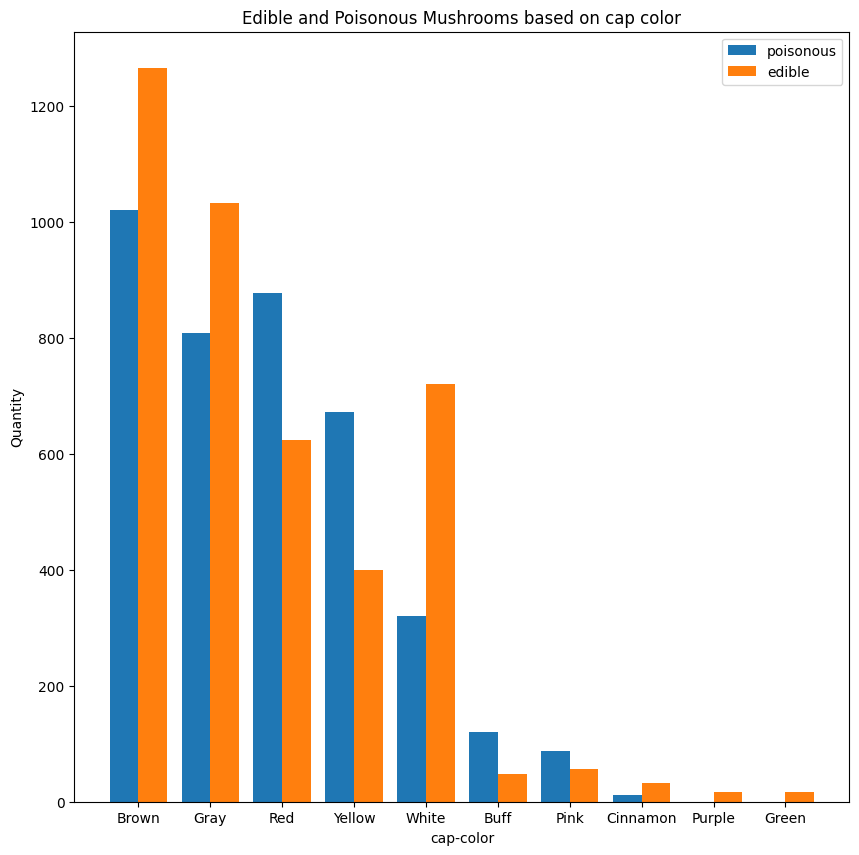

In [144]:
fig,ax=plt.subplots(figsize=(10,10))
width = 0.4
ind = np.arange(10)
pois_bar = ax.bar(ind, np.array(poisonous),width)
edible_bar = ax.bar(ind + width, np.array(edible),width)
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('Brown','Gray','Red','Yellow','White','Buff','Pink','Cinnamon','Purple','Green'),fontsize=10)
ax.legend((pois_bar,edible_bar),('poisonous','edible'),fontsize = 10)
plt.title('Edible and Poisonous Mushrooms based on cap color')
plt.xlabel('cap-color')
plt.ylabel('Quantity')
plt.show()

In [145]:
odor = df['odor'].value_counts()
print(odor.values)

[3528 2160  576  576  400  400  256  192   36]


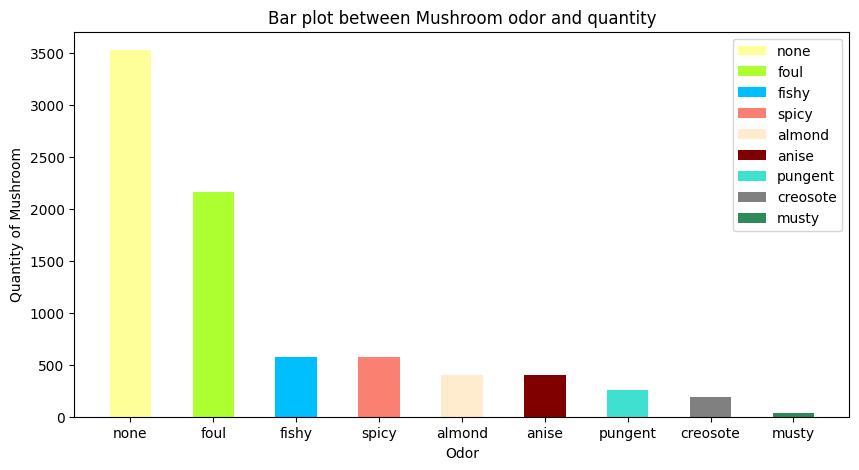

In [146]:
odor = df['odor'].value_counts()
odor_ind = np.array(odor.index)
odor_num = np.array(odor.values)
# cap_ind
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']
width = 0.5
odor = np.array(odor)
ind = np.arange(9)
fig, ax = plt.subplots(figsize = (10,5))
bars = ax.bar(ind,odor_num, width, color = colors)
ax.set_xticks(ind)
ax.set_xticklabels(('none','foul','fishy','spicy','almond','anise','pungent','creosote','musty'), fontsize=10)
ax.set_xlabel('Odor')
ax.set_ylabel('Quantity of Mushroom')
ax.set_title('Bar plot between Mushroom odor and quantity')
ax.legend(bars,['none','foul','fishy','spicy','almond','anise','pungent','creosote','musty'] )
plt.show()

In [147]:
odor_ind

array(['n', 'f', 'y', 's', 'a', 'l', 'p', 'c', 'm'], dtype=object)

In [148]:
poisonous_odor = []
edible_odor = []
for ind in odor_ind:
  p = 0
  for odor in range(len(df['odor'])):
    # print(color, ind)
    if(df['odor'][odor] == ind and df['class'][odor] == 'p'):
      p = p + 1
  poisonous_odor.append(p)
  q = 0
  for odor in range(len(df['odor'])):
    if(df['odor'][odor] == ind and df['class'][odor] == 'e'):
      q = q + 1
  edible_odor.append(q)

In [149]:
print(poisonous_odor)
print(edible_odor)

[120, 2160, 576, 576, 0, 0, 256, 192, 36]
[3408, 0, 0, 0, 400, 400, 0, 0, 0]


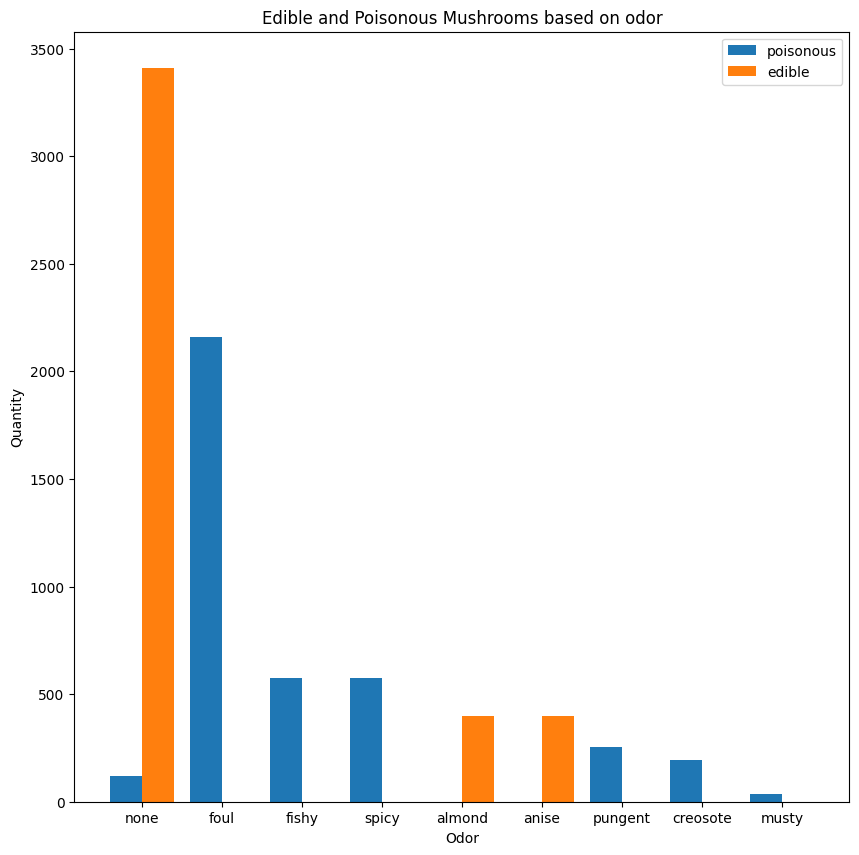

In [150]:
fig,ax=plt.subplots(figsize=(10,10))
width = 0.4
ind = np.arange(9)
pois_bar = ax.bar(ind, np.array(poisonous_odor),width)
edible_bar = ax.bar(ind + width, np.array(edible_odor),width)
ax.set_xticks(ind + width/2)
ax.set_xticklabels(('none','foul','fishy','spicy','almond','anise','pungent','creosote','musty'),fontsize=10)
ax.legend((pois_bar,edible_bar),('poisonous','edible'),fontsize = 10)
plt.title('Edible and Poisonous Mushrooms based on odor')
plt.xlabel('Odor')
plt.ylabel('Quantity')
plt.show()

([<matplotlib.patches.Wedge at 0x7926db6958d0>,
 [Text(0.009358124911997105, 1.0999601926879587, 'several'),
  Text(-0.8789937249907459, -0.6613395734619948, 'solitary'),
  Text(0.26055804803624244, -1.1713707797292638, 'scattered'),
  Text(0.8308685231238587, -0.7208727330687282, 'numerous'),
  Text(1.0081941711664915, -0.43993694232913827, 'abundant'),
  Text(1.0905058768055351, -0.14421141651267197, 'clustered')],
 [Text(0.005104431770180239, 0.5999782869207048, '49.7%'),
  Text(-0.479451122722225, -0.36073067643381534, '21.1%'),
  Text(0.15199219468780806, -0.6832996215087371, '15.4%'),
  Text(0.4532010126130138, -0.393203308946579, '4.9%'),
  Text(0.5499240933635408, -0.23996560490680266, '4.7%'),
  Text(0.5948213873484736, -0.0786607726432756, '4.2%')])

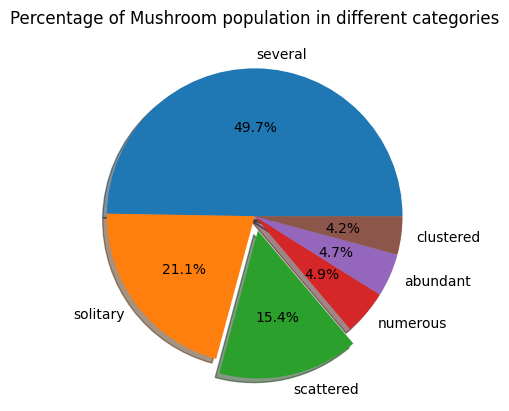

In [151]:
population = np.array(df['population'].value_counts())
pop_type = np.array(df['population'].value_counts().index)
pop_labels = ['several','solitary','scattered','numerous','abundant','clustered']
plt.title("Percentage of Mushroom population in different categories")
explode = (0,0,0.1,0,0,0)
plt.pie(population, labels = pop_labels, explode = explode, autopct = '%1.1f%%',shadow = True)

In [152]:
poisonous_pop = []
edible_pop = []
for ind in pop_type:
  p = 0
  for population in range(len(df['population'])):
    # print(color, ind)
    if(df['population'][population] == ind and df['class'][population] == 'p'):
      p = p + 1
  poisonous_pop.append(p)
  q = 0
  for color in range(len(df['population'])):
    if(df['population'][population] == ind and df['class'][population] == 'e'):
      q = q + 1
  edible_pop.append(q)

In [153]:
habitat = np.array(df['habitat'].value_counts())
habitat_type = np.array(df['habitat'].value_counts().index)
habitat_type

array(['d', 'g', 'p', 'l', 'u', 'm', 'w'], dtype=object)

([<matplotlib.patches.Wedge at 0x7926db6ff3d0>,
 [Text(0.38074870586513543, 1.032003111905204, 'woods'),
  Text(-1.0915886006808682, -0.1357730712018551, 'grasses'),
  Text(-0.19045446318602216, -1.083386864168347, 'paths'),
  Text(0.6120995040859516, -0.9139661903471771, 'leaves'),
  Text(0.9564331889063677, -0.5433558273897469, 'urban'),
  Text(1.0626284116740286, -0.28429009603419425, 'meadows'),
  Text(1.4958673878612885, -0.11126885428117506, 'waste')],
 [Text(0.20768111229007385, 0.5629107883119293, '38.7%'),
  Text(-0.5954119640077462, -0.07405803883737551, '26.4%'),
  Text(-0.10388425264692118, -0.5909382895463711, '14.1%'),
  Text(0.3338724567741554, -0.498527012916642, '10.2%'),
  Text(0.5216908303125641, -0.2963759058489528, '4.5%'),
  Text(0.5796154972767428, -0.15506732510956048, '3.6%'),
  Text(0.9972449252408591, -0.07417923618745004, '2.4%')])

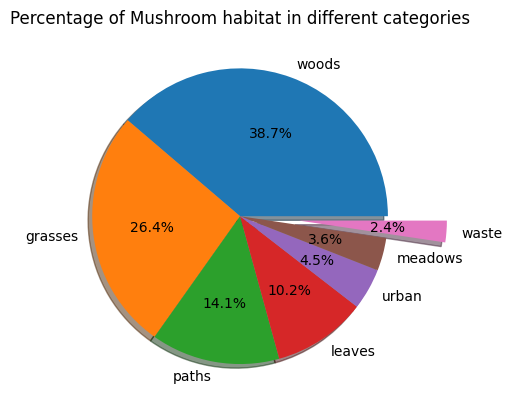

In [154]:
habitat = np.array(df['habitat'].value_counts())
habitat_type = np.array(df['habitat'].value_counts().index)
habitat_labels = ['woods','grasses','paths','leaves','urban','meadows','waste']
plt.title("Percentage of Mushroom habitat in different categories")
explode = (0,0,0,0,0,0,0.4)
plt.pie(habitat, labels = habitat_labels, explode = explode, autopct = '%1.1f%%',shadow = True)

<ipython-input-155-d1c6e4dd9cb4>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,10))


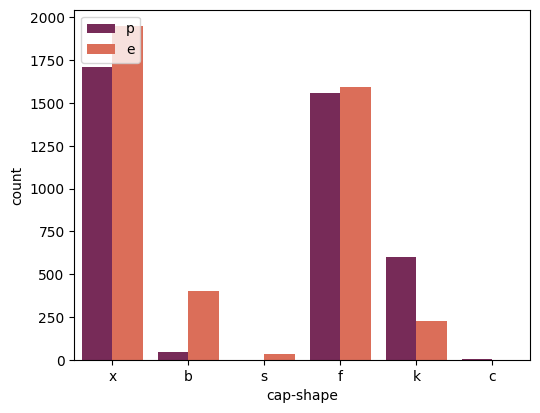

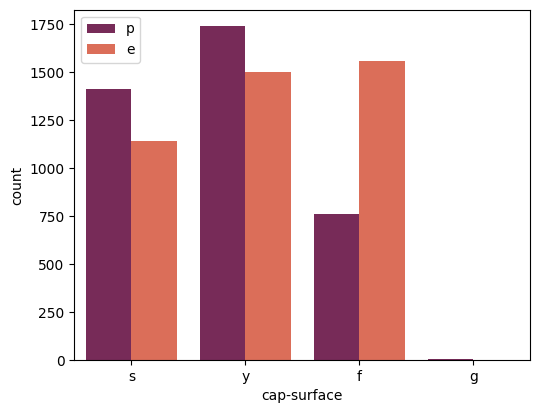

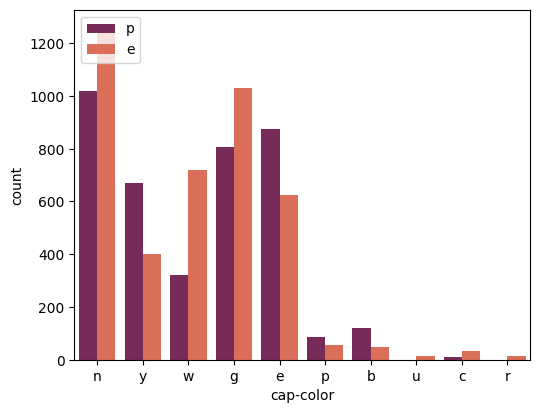

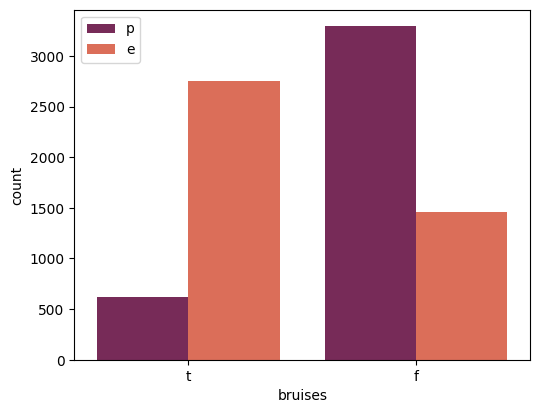

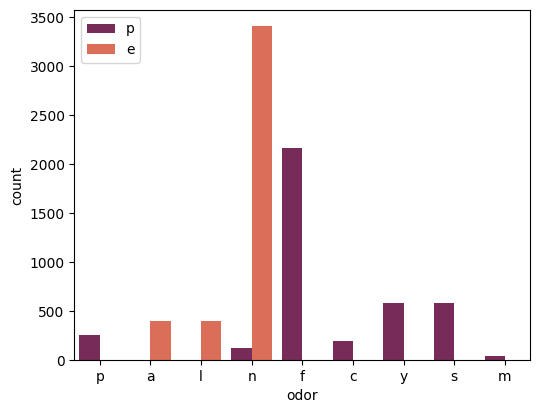

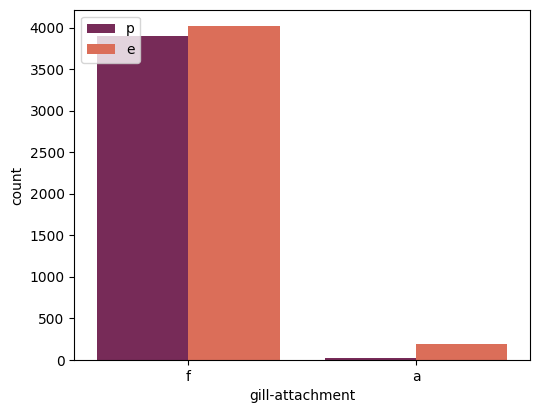

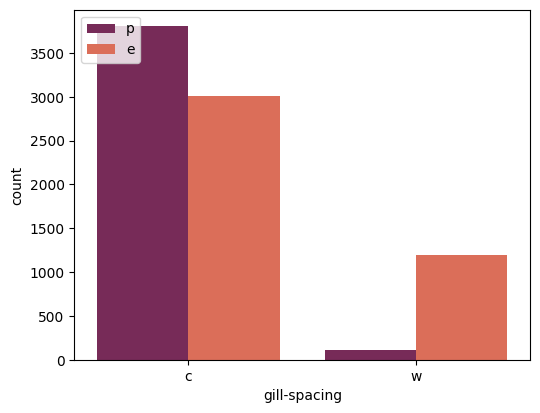

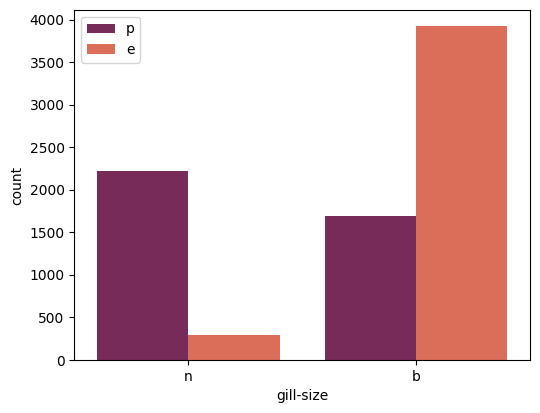

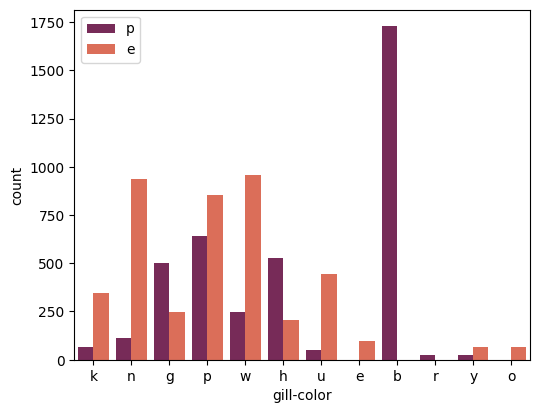

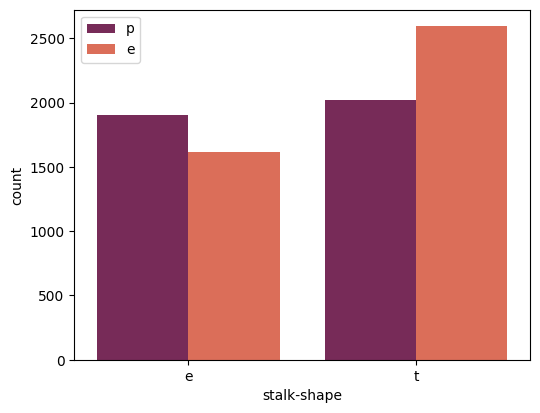

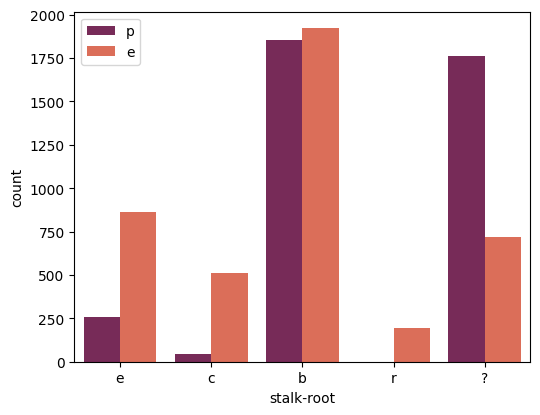

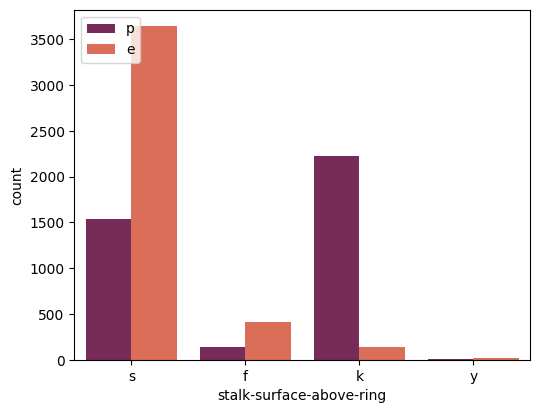

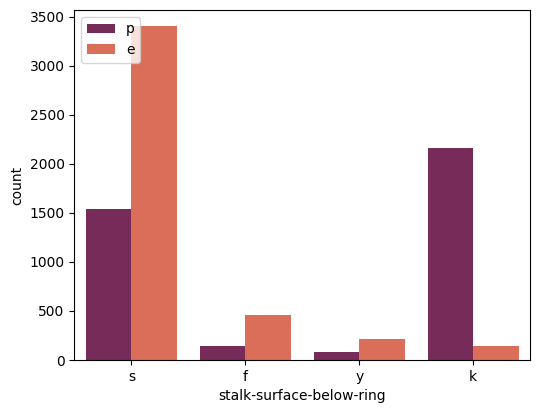

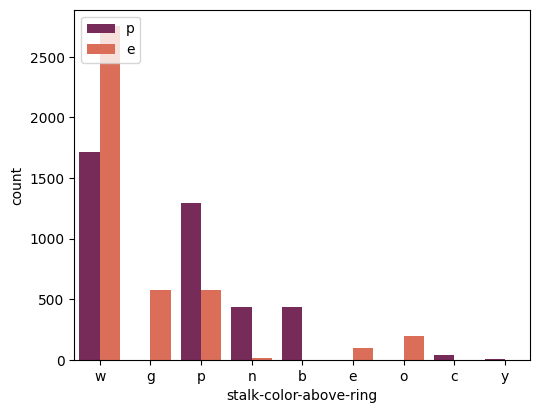

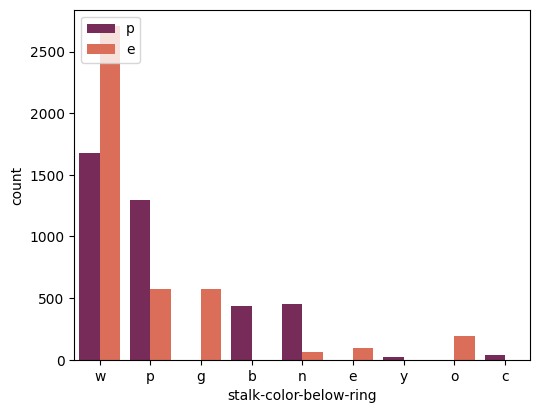

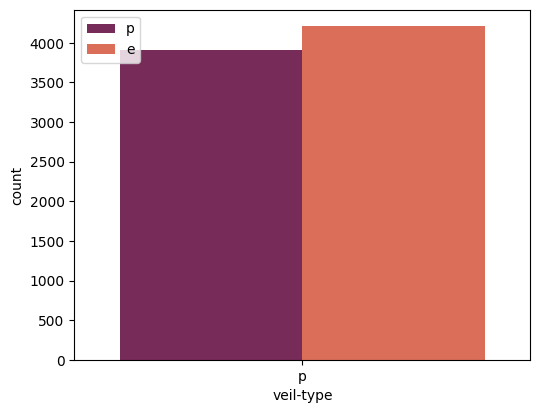

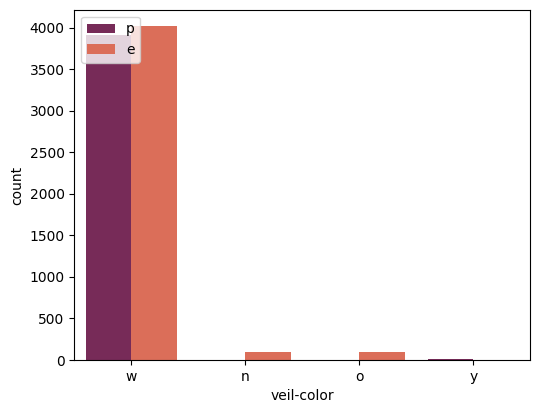

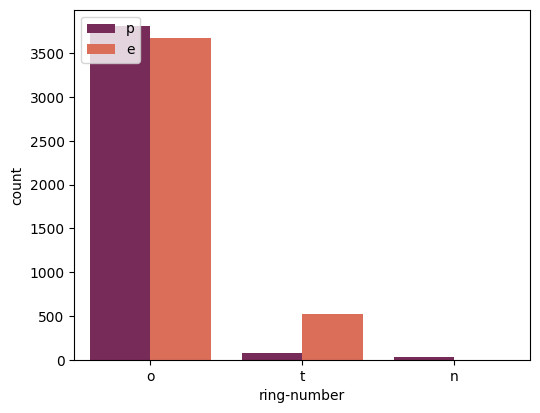

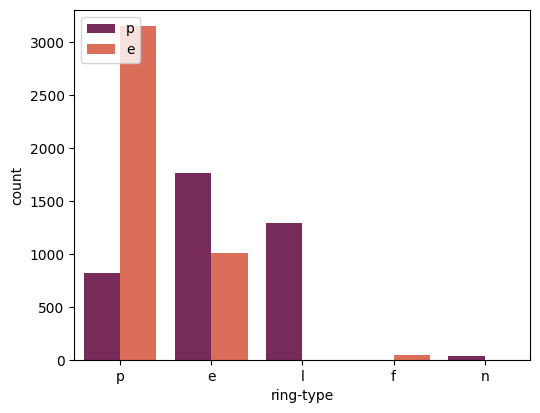

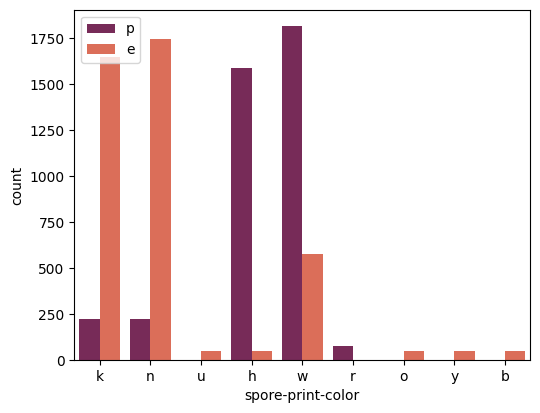

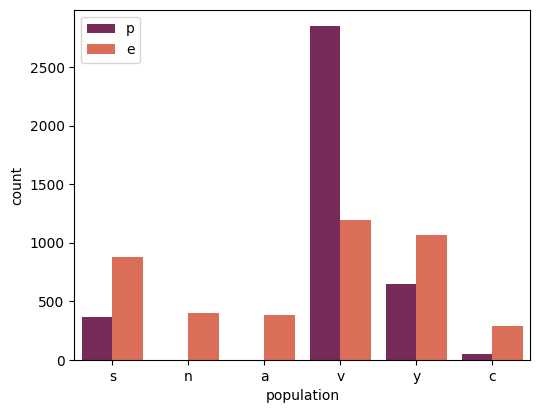

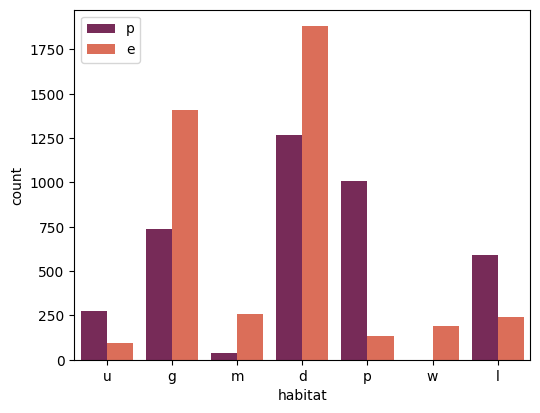

In [155]:
for column in col[1:]:
  plt.figure(figsize=(20,10))
  plt.subplot(2,3,1)
  sns.countplot(x=column ,hue='class', data=df ,palette='rocket')
  plt.xlabel(column, fontsize=10)
  plt.legend(loc='upper left')

In [156]:
del_cols = ['class','gill-attachment', 'stalk-shape', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number']

In [157]:
x = df.copy()
for col in del_cols:
  x = x.drop(col,axis = 1)

In [158]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-color-above-ring,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,c,n,k,e,s,w,p,k,s,u
1,x,s,y,t,a,c,b,k,c,s,w,p,n,n,g
2,b,s,w,t,l,c,b,n,c,s,w,p,n,n,m
3,x,y,w,t,p,c,n,n,e,s,w,p,k,s,u
4,x,s,g,f,n,w,b,k,e,s,w,e,n,a,g


In [159]:
x = pd.get_dummies(x,columns=x.columns,drop_first = True)

In [160]:
x.head(5)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [161]:
  y = df['class']
  encoder_y = LabelEncoder()
  y = encoder_y.fit_transform(y)
  y

array([1, 0, 0, ..., 0, 1, 0])

In [162]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.2, random_state=101)

In [163]:
def cross_val(model_name,model,x,y,cv):
    scores = CVS(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

index = ['Valid1','Valid2','Valid3','Valid4','Valid5']
scoring = ['accuracy','precision', 'recall','f1']

In [164]:
LR = LogisticRegression()
LR_report = pd.DataFrame(cross_validate(LR, x, y, scoring=scoring))
# print(LR_report)
LR_report = LR_report.iloc[:,2:]
LR_report.columns = scoring
LR_report.index = index

model_1 = []

print("Clasification report:\n")
print(LR_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(LR_report[score].mean(),4)}")
    model_1.append(round(LR_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.896000   1.000000  0.784439  0.879199
Valid2  0.999385   1.000000  0.998723  0.999361
Valid3  0.973538   1.000000  0.945083  0.971766
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.862069   0.782038  0.989783  0.873732 


Mean Scores:

	accuracy: 0.9462
	precision: 0.9564
	recall: 0.9436
	f1: 0.9448


In [165]:
LR.fit(x_train, y_train)
y_predict = LR.predict(x_test)
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")

In [166]:
lr = pd.read_csv('Logistic Regression.csv')

In [167]:
lr

,Unnamed: 0,y_test,prediction
0,0,1,1
1,1,0,0
2,2,1,1
3,3,0,0
4,4,0,0
...,...,...,...
1620,1620,1,1
1621,1621,0,0
1622,1622,0,0
1623,1623,0,0


In [168]:
lr.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [169]:
count_test = np.array(lr['y_test'].value_counts())
count_pred = np.array(lr['prediction'].value_counts())

In [170]:
print(count_test)
print(count_pred)

[851 774]
[852 773]


Text(0.5, 1.0, 'Prediction')

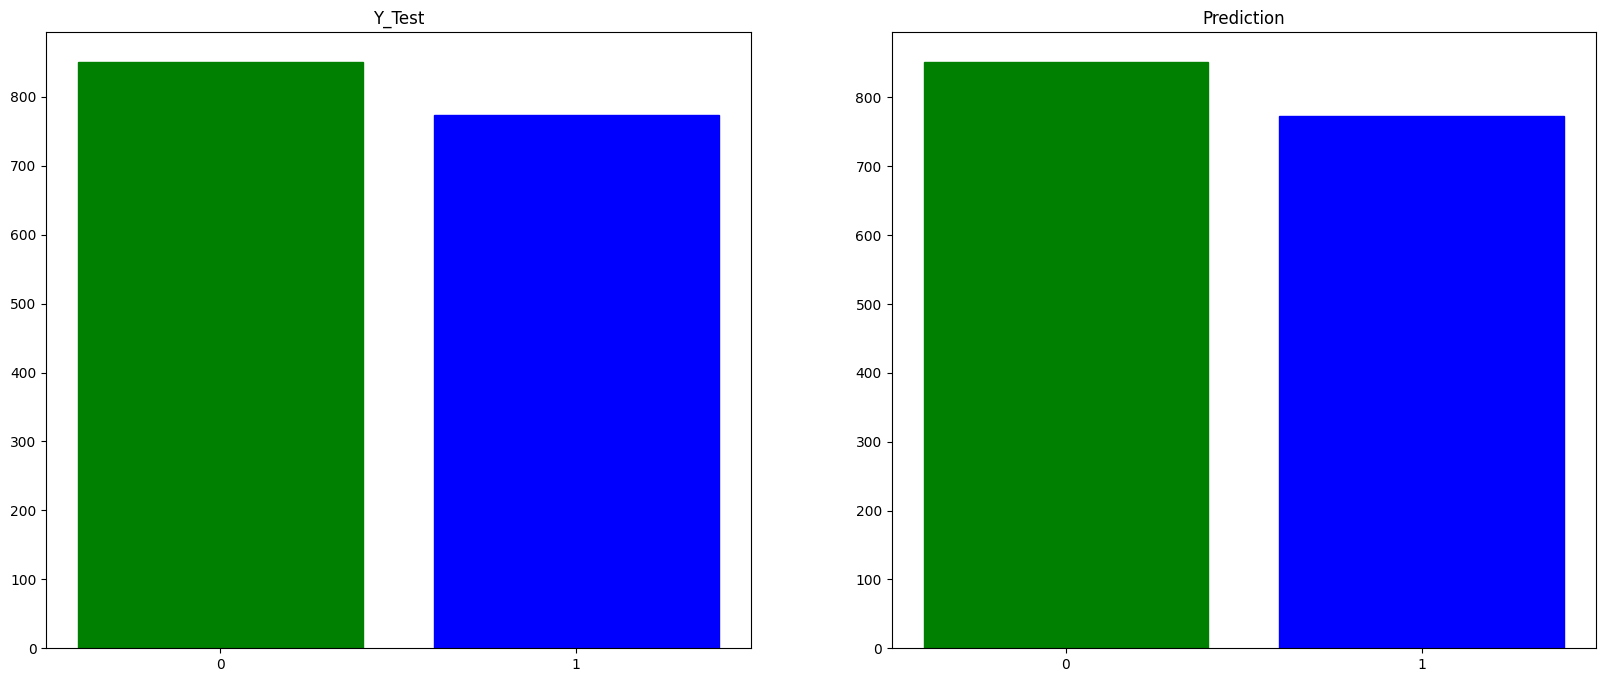

In [171]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
label = ['0','1']
bars1 = plt.bar(label,count_test)
bars1[0].set_color('green')
bars1[1].set_color('blue')
plt.title('Y_Test')
plt.subplot(1,2,2)
bars2 = plt.bar(label,count_pred)
bars2[0].set_color('green')
bars2[1].set_color('blue')
plt.title('Prediction')

In [172]:
DT = DecisionTreeClassifier()
DT_report = pd.DataFrame(cross_validate(DT, x, y, scoring=scoring))
DT_report = DT_report.iloc[:,2:]
DT_report.columns = scoring
DT_report.index = index

model_2 = []

print("Clasification report:\n")
print(DT_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(DT_report[score].mean(),4)}")
    model_2.append(round(DT_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.921231   1.000000  0.836735  0.911111
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  1.000000   1.000000  1.000000  1.000000
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.729064   0.642088  0.989783  0.778894 


Mean Scores:

	accuracy: 0.9301
	precision: 0.9284
	recall: 0.9653
	f1: 0.938


In [173]:
DT.fit(x_train, y_train)
y_predict = DT.predict(x_test)
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Decision Tree.csv")

In [174]:
dt = pd.read_csv('Decision Tree.csv')

In [175]:
dt

,Unnamed: 0,y_test,prediction
0,0,1,1
1,1,0,0
2,2,1,1
3,3,0,0
4,4,0,0
...,...,...,...
1620,1620,1,1
1621,1621,0,0
1622,1622,0,0
1623,1623,0,0


In [176]:
dt.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [177]:
count_test = np.array(dt['y_test'].value_counts())
count_pred = np.array(dt['prediction'].value_counts())

In [178]:
print(count_test)
print(count_pred)

[851 774]
[851 774]


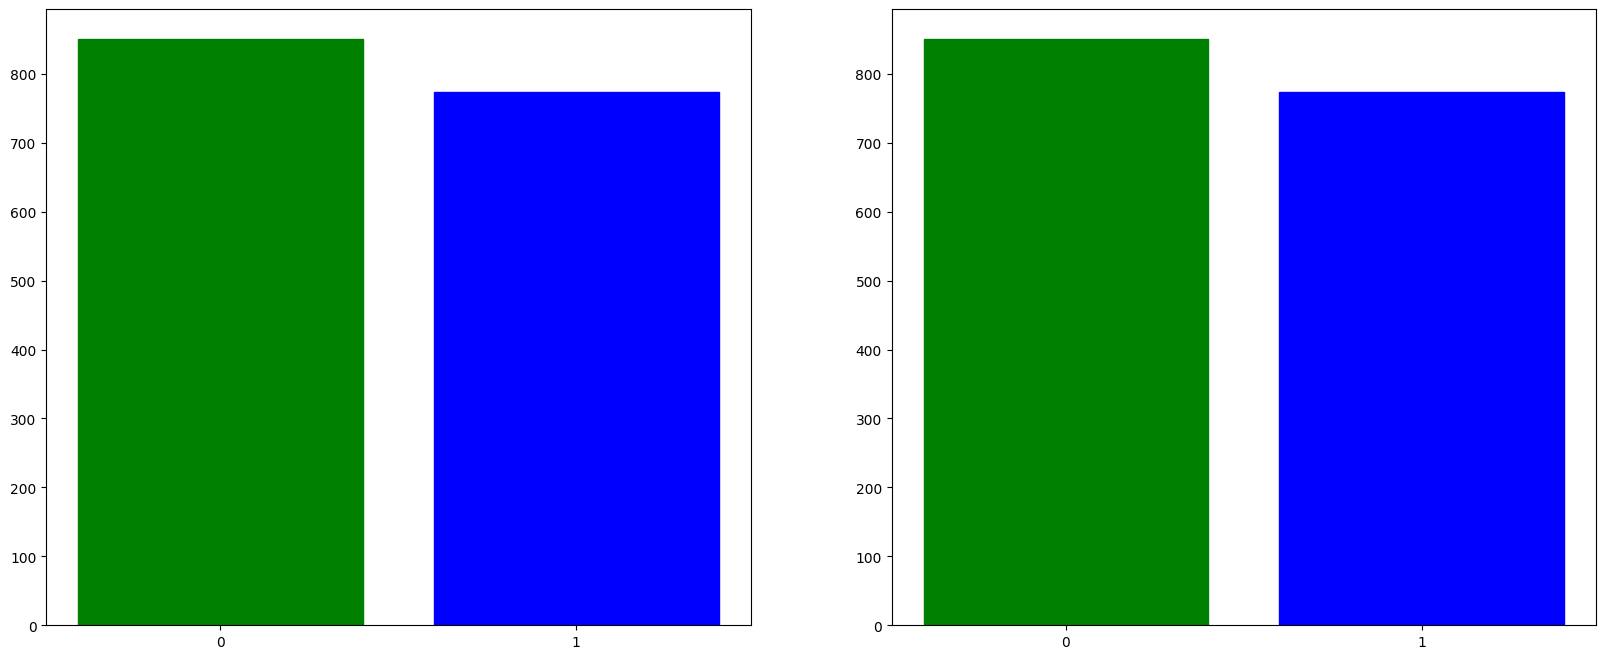

In [179]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
label = ['0','1']
bars1 = plt.bar(label,count_test)
bars1[0].set_color('green')
bars1[1].set_color('blue')

plt.subplot(1,2,2)
bars2 = plt.bar(label,count_pred)
bars2[0].set_color('green')
bars2[1].set_color('blue')


In [180]:
RF = RandomForestClassifier()
RF_report = pd.DataFrame(cross_validate(RF, x, y, scoring=scoring))
RF_report = RF_report.iloc[:,2:]
RF_report.columns = scoring
RF_report.index = index

model_3 = []

#Classification report
print("Clasification report:\n")
print(RF_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(RF_report[score].mean(),4)}")
    model_3.append(round(RF_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462   1.000000  0.673469  0.804878
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  0.998769   1.000000  0.997446  0.998721
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.865764   0.782218  1.000000  0.877803 


Mean Scores:

	accuracy: 0.9414
	precision: 0.9564
	recall: 0.9342
	f1: 0.9363


In [181]:
RF.fit(x_train, y_train)
y_predict = RF.predict(x_test)
Random_Forest = pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Random Forest.csv")

In [182]:
rf = pd.read_csv('Random Forest.csv')

In [183]:
rf.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [184]:
count_test = np.array(rf['y_test'].value_counts())
count_pred = np.array(rf['prediction'].value_counts())

In [185]:
print(count_test)
print(count_pred)

[851 774]
[851 774]


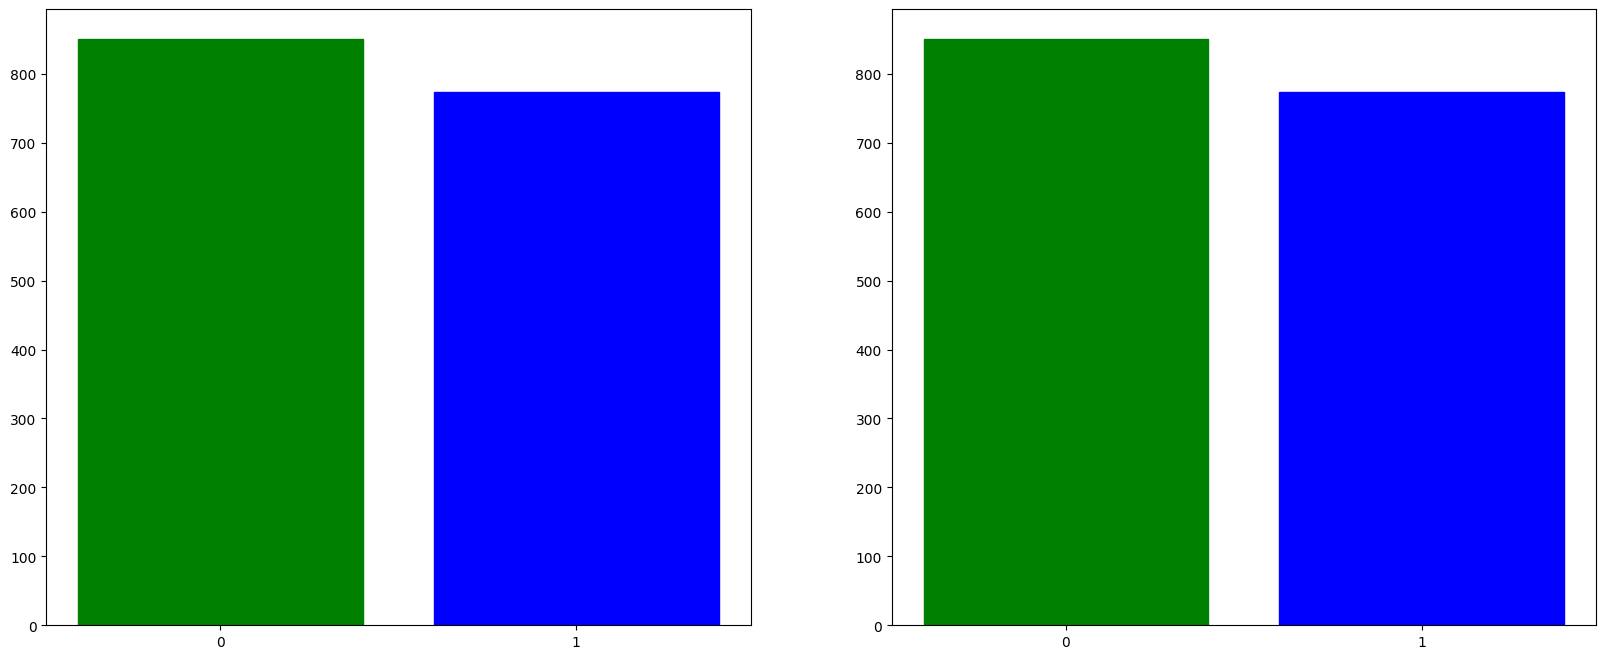

In [186]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
label = ['0','1']
bars1 = plt.bar(label,count_test)
bars1[0].set_color('green')
bars1[1].set_color('blue')

plt.subplot(1,2,2)
bars2 = plt.bar(label,count_pred)
bars2[0].set_color('green')
bars2[1].set_color('blue')


In [187]:
XGB = XGBClassifier()
#cross validation
XGB_report = pd.DataFrame(cross_validate(XGB, x, y, scoring=scoring))
#getting required score methods
XGB_report = XGB_report.iloc[:,2:]
#naming the columns
XGB_report.columns = scoring
#naming the index
XGB_report.index = index

#final result collection
model_4 = []

#Classification report
print("Clasification report:\n")
print(XGB_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(XGB_report[score].mean(),4)}")
    model_4.append(round(XGB_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462   1.000000  0.673469  0.804878
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  0.997538   1.000000  0.994891  0.997439
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.898399   0.829424  0.993614  0.904126 


Mean Scores:

	accuracy: 0.9477
	precision: 0.9659
	recall: 0.9324
	f1: 0.9413


In [188]:
#sample prediction for csv file
XGB.fit(x_train, y_train)#training
y_predict = XGB.predict(x_test)#predicting
XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
XGBoost.to_csv("XGBoost.csv")#export to csv

In [189]:
#model
SVM = SVC(kernel = 'linear')
#cross validation
SVM_report = pd.DataFrame(cross_validate(SVM, x, y, scoring=scoring))
#getting required score methods
SVM_report = SVM_report.iloc[:,2:]
#naming the columns
SVM_report.columns = scoring
#naming the index
SVM_report.index = index

#final result collection
model_5 = []

#Classification report
print("Clasification report:\n")
print(SVM_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(SVM_report[score].mean(),4)}")
    model_5.append(round(SVM_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462   1.000000  0.673469  0.804878
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  0.995692   1.000000  0.991060  0.995510
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.805419   0.715605  0.989783  0.830654 


Mean Scores:

	accuracy: 0.9287
	precision: 0.9431
	recall: 0.9309
	f1: 0.9262


In [190]:
#sample prediction for csv file
SVM.fit(x_train, y_train)#training
y_predict = SVM.predict(x_test)#predicting
Support_Vector_Machines=pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
Support_Vector_Machines.to_csv("Support Vector Machines.csv")#export to csv

In [191]:
Models = pd.DataFrame({
    'Logistic Regression': np.array(model_1),
    'Decision Tree': np.array(model_2),
    'Random Forest': np.array(model_3),
    'XGBoost': np.array(model_4),
    'Support Vector Machines': np.array(model_5)})
Models.index = scoring
#Models.sort_values(by='Score', ascending=False)
Models

,Logistic Regression,Decision Tree,Random Forest,XGBoost,Support Vector Machines
accuracy,0.9462,0.9301,0.9414,0.9477,0.9287
precision,0.9564,0.9284,0.9564,0.9659,0.9431
recall,0.9436,0.9653,0.9342,0.9324,0.9309
f1,0.9448,0.9380,0.9363,0.9413,0.9262


In [192]:
df = pd.read_csv('mushrooms.csv')

In [193]:
y = df['class']
x = df.drop(['class'],axis = 1)

In [194]:
x = pd.get_dummies(x,columns=x.columns,drop_first = True)

In [195]:
x.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [196]:
y = pd.get_dummies(y,drop_first = True)

In [197]:
y.head()

,p
0,1
1,0
2,0
3,1
4,0


In [198]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [199]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [200]:
model = Sequential()
model.add(Dense(64,activation = 'relu', kernel_initializer = 'uniform', input_dim = 95))
model.add(Dense(32,activation = 'relu', kernel_initializer = 'uniform'))
model.add(Dense(1,activation = 'sigmoid', kernel_initializer = 'uniform'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
early_stopping=tf.keras.callbacks.EarlyStopping(patience=20)

In [201]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                6144      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,257
Trainable params: 8,257
Non-trainable params: 0
_________________________________________________________________


In [202]:
model.fit(x_train, y_train, batch_size = 80, epochs = 100,validation_data=(x_test,y_test),verbose=2,callbacks=[early_stopping])

Epoch 1/100
82/82 - 1s - loss: 0.4213 - accuracy: 0.8775 - val_loss: 0.0827 - val_accuracy: 0.9680 - 1s/epoch - 18ms/step
Epoch 2/100
82/82 - 0s - loss: 0.0369 - accuracy: 0.9903 - val_loss: 0.0148 - val_accuracy: 0.9994 - 266ms/epoch - 3ms/step
Epoch 3/100
82/82 - 0s - loss: 0.0097 - accuracy: 0.9988 - val_loss: 0.0060 - val_accuracy: 0.9994 - 299ms/epoch - 4ms/step
Epoch 4/100
82/82 - 0s - loss: 0.0041 - accuracy: 0.9997 - val_loss: 0.0027 - val_accuracy: 0.9994 - 316ms/epoch - 4ms/step
Epoch 5/100
82/82 - 0s - loss: 0.0021 - accuracy: 0.9998 - val_loss: 0.0016 - val_accuracy: 1.0000 - 300ms/epoch - 4ms/step
Epoch 6/100
82/82 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000 - 286ms/epoch - 3ms/step
Epoch 7/100
82/82 - 0s - loss: 8.5481e-04 - accuracy: 1.0000 - val_loss: 7.4827e-04 - val_accuracy: 1.0000 - 307ms/epoch - 4ms/step
Epoch 8/100
82/82 - 0s - loss: 6.0678e-04 - accuracy: 1.0000 - val_loss: 5.4229e-04 - val_accuracy: 1.0000 - 262ms/epoch - 3ms

In [203]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
print(report)

51/51 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       751

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [204]:
y_test

,p
3602,0
7049,1
2232,0
1900,0
2139,0
...,...
7351,1
7950,1
2828,0
3720,0


In [205]:
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [206]:
pred = []
for i  in range(len(y_pred)):
  if(y_pred[i] == False):
    pred.append(0)
  else:
    pred.append(1)

In [207]:
pred

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,


In [208]:
count = 0
y_test = np.array(y_test)
pred = np.array(pred)
for i in range(len(pred)):
  if(pred[i] == y_test[i]):
    count = count + 1
print("Test accuracy : ", count/len(pred))

Test accuracy :  1.0
